## Info 113 Introduction to Data Science
## Homework 2: VI-ME-BA-BAR on real data

# Utilities
When authoring a report on a data analysis -- like this document -- the aim is to make the code as readable as possible, highlighting *what* is being computed, and abstracting away the *technical details*.

With Jupyter notebooks, this is typically achieved by implementing a collection of utilities in separate *code files*. A nice feature is that one can use *introspection* to quickly look at the code of the utilities, and hence explore the details when so desired (see below).

For this analysis, several such utilities are provided in the [code subdirectory](code/). At this stage we do not expect you to be able to rewrite all of them, but you should definitely check them out and try to understand them.
You will implement some additional ones of your own design.

We first load the Python libraries that will be used in this analysis:

In [ ]:
import os, re
from glob import glob as ls
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns; sns.set()
from PIL import Image
%load_ext autoreload
%autoreload 2

Now we load the provided utilities

In [ ]:
code_dir = './code'
from sys import path; path.append(code_dir); 
from utilities import *
from my_utilities import *

Now you can look at the documentation of the function `get_images` (*what it does*):

In [15]:
get_images?

And its code (*how it does it*):

In [14]:
get_images??

# Step 1: {VI}sualization and data preprocessing 

Let's load the images from the dataset, and have a look at them:

In [ ]:
data_dir = './mini-dataset'
a_images = get_images(data_dir, 'a*.png')
b_images = get_images(data_dir, 'b*.png')
images = a_images + b_images

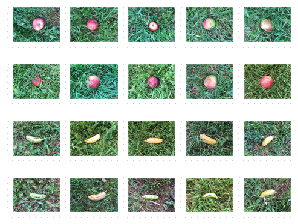

In [17]:
show_images(images)

## Preprocessing
Data often come already in a feature representation, but not always. As an exercise, we are going to guide you through a simple feature extraction process.

### Question 1: Crop an image
The fruit is located at the center and there is a lot of "useless" background around. To simplify the problem and run the code faster, we will crop the images to 32x32 pixel maps. Put the answer to each sub-question in a separate cell.

<u>Question 1.1</u>: Like in homework 1, create 2 lists `a_files` and `b_files` containing the names of all the examples (apples and bananas). Then, create a variable called `banana_example` and assign it the name of file 0 in the list `b_files`. Create a variable `img` and assign it the corresponding image read from that file. Assign to two variables `width` and `height` the dimension of the original image. Print `width` and `height`. Show the oroginal image.

<u>Question 1.2</u>: Create a variable `cropped_img` and assign it a 32x32 image centered so the apple show in the middle. Finally, recompute `width` and `height` as the dimension of the cropped image. Print `width` and `height`. Show the cropped image.

<u>Question 1.3</u>: Create a filter to crop images. Use this template:

    def crop_image(img, crop_size = 32):
        ''' Crop a PIL image to crop_size x crop_size.'''
        # YOUR CODE HERE
        return cropped_img

Apply it to the function `show_images1` to show the cropped images of apples and bananas.

81 60


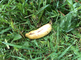

In [4]:
# Solution of question 1.1
a_files = get_files(data_dir, 'a')
b_files = get_files(data_dir, 'b')
banana_example = b_files[0]
img=get_image(banana_example)
width, height = img.size
print(width, height)
img

32 32


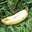

In [5]:
# Solution of question 1.2
crop_size = 32
width, height = img.size
new_width = 1.*crop_size
new_height = 1.*crop_size
left = round((width - new_width)/2)
top = round((height - new_height)/2)
right = round((width + new_width)/2)
bottom = round((height + new_height)/2)
    
cropped_img = img.crop((left, top, right, bottom))
width, height = cropped_img.size
print(width, height)
cropped_img

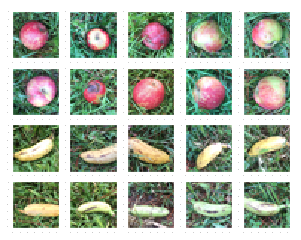

In [6]:
# Solution of question 1.3
def crop_image(img, crop_size = 32):
    ''' Crop a PIL image to crop_size x crop_size.'''
    # First determine the bounding box
    width, height = img.size
    new_width = 1.*crop_size
    new_height = 1.*crop_size
    left = round((width - new_width)/2)
    top = round((height - new_height)/2)
    right = round((width + new_width)/2)
    bottom = round((height + new_height)/2)
    # Then crop the image to that box
    cropped_img = img.crop((left, top, right, bottom))
    return cropped_img

show_images(all_files, crop_image)

### Question 2: Coersion of images as numpy arrays
Remember from homework 1 that it is convenient to use numpy arrays because we can they use a lot of pre-programmed library functions.

<u>Question 2.1</u>: Create a variable called `M` and assign it a numpy array containing `cropped_img`. Assign to three variables `imw`, `imh`, `nchannels` the dimensions (shape) of `M`. Then print `imw`, `imh`, and `nchannels`. Check that the dimensions are consistent with `width` and `height`.  You will notice that there are only 3 channels! Do you remember what those channels are?

<u>Question 2.2</u>: Using `imshow` show the array `M` as an image.

<u>Question 2.3</u>: Write a function that takes the `path` to an image as input and returns a cropped image as a numpy array. Use this template:

    def get_numpy_image(path):
    '''The variable path contains the file name of an image. M is a numpy array of the cropped image.'''
    # YOUR CODE HERE
    return M
    
Test it by calling it to load `a_files[0]` as a matrix `M`, then show the image.

In [7]:
# Solution of question 2.1
M = np.array(cropped_img)
imw, imh, nchannels = M.shape
print(imw, imh, nchannels)

32 32 3


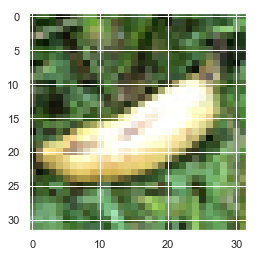

In [8]:
# Solution of question 2.2
plt.imshow(M) 

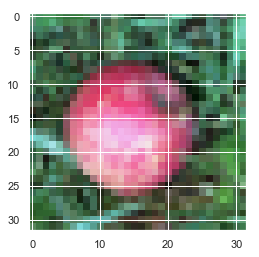

In [9]:
# Solution of question 2.3
def get_numpy_image(path):
    '''The variable path contains the file name of an image. M is a numpy array of the cropped image.'''
    img=get_image(path)
    cropped_img = img.crop((left, top, right, bottom))
    M = np.array(cropped_img)
    return M

M = get_numpy_image(a_files[0])
plt.imshow(M) 

### Question 3: Foreground and background colors
Examine the colors of the foreground and the background: 

<u>Question 3.1</u>: Assign to variables `fg_r`, `fg_g`, and `fg_b` the average (mean) of the channel values of the pixels in a square of size 10x10 centered in the middle of the image. Print `fg_r`, `fg_g`, and `fg_b`. 

<u>Question 3.2</u>: Assign to variables `bg_r`, `bg_g`, and `bg_b` the average of the channel values of the pixels in a square of size 10x10 located in the upper corner of the image. Print `bg_r`, `bg_g`, and `bg_b`. 

Do the color codes make sense to you (do they match your perception)?

<u>Question 3.3</u>: Create two small images of uniform colors using the average colors you just extracted and display them side by side. <b>HINT:</b> use `np.tile` and `fig.add_subplot`.

In [10]:
# Solution of question 3.1
# Foreground color
fg_r, fg_g, fg_b =  np.mean(np.mean(M[10:20, 10:20], axis=1), axis=0)
print(fg_r, fg_g, fg_b)

221.6 125.36999999999998 166.38


In [11]:
# Solution of question 3.2
# Background color
bg_r, bg_g, bg_b =  np.mean(np.mean(M[0:10, 0:10], axis=1), axis=0)
print(bg_r, bg_g, bg_b)

62.239999999999995 100.97999999999999 72.50999999999999


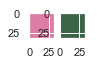

In [12]:
# Solution of question 3.3
fig=plt.figure(figsize=(1, 2))
FG = np.tile([int(fg_r), int(fg_g), int(fg_b)], (32, 32, 1))
fig.add_subplot(1, 2, 1)
plt.imshow(FG)
BG = np.tile([int(bg_r), int(bg_g), int(bg_b)], (32, 32, 1))
fig.add_subplot(1, 2, 2)
plt.imshow(BG)

### Question 4: Separate color channels and visualize them to separate image from background
<u>Question 4.1</u>: As before, we will define three arrays of type `float` named `R`, `G`, and `B`, containing the red, green and blue channels respectively (for all pixels) Then define an array `D` (color difference) containing `R-(G+B)/2` and an array `V` (value of intensity) containing `(R+G+B)/3`. <b>IMPORTANT</b>: you will need to convert interger values to float (for instance by multiplying the arrays by 1.) because otherwise, integer addition will be applied.

<u>Question 4.2</u>: Difference filter. Write a little function that takes the cropped image M as input and returns array `D`. Follow this template:

    def difference_filter(img):
        '''Extract a numpy array D = R-(G+B)/2 from a PIL image.'''
        # Your code here
        return D

Then apply this filter to `show_images`.
        
<u>Question 4.3</u>: Value filter. Do the same think as in the previous question, but for array `V`. Follow this template:

    def value_filter(img):
        '''Extract a numpy array V = (R+G+B)/3 from a PIL image.'''
        # Your code here
        return D

<u>Question 4.4</u>: Foreground filter. Create a foreground filter returning an array `F` (foreground), which has value `True` for most foreground pixels and value `False` for most background pixels. Follow this template:

    def foreground_filter(img):
        '''Extract a numpy array with True as foreground 
        and False as background from a PIL image.'''
        # Your code here
        return F
        
<b>HINT:</b> Which of `D` or `V` is more contrasted to separate foreground from background in the apple or banana images? Take the pixel-wise `maximum` between `D` and `V` and call it `F0`. Then define a `threshold` as the middle point between the minimum and the maximum value of `F0`. Then `F` values are `True` if `F0` exceeds the `threshold`. Other methods or ideas are possible.

<u>Question 4.5</u>: Transparent background filter. Create a filter for a PLI image that replaces the background by a transparent background. Return a PIL image. Use this template:

    def transparent_background_filter(img):
        '''Create a cropped image with transparent background.'''
        # Your code here
        return new_img

In [13]:
# Solution of question 4.1
# Remember to first cast the arrays R, G, B as arrays of FLOATS!
R = 1.*M[:,:,0]; G = 1.*M[:,:,1]; B = 1.*M[:,:,2]
D = R-(G+B)/2
V = (R+G+B)/3

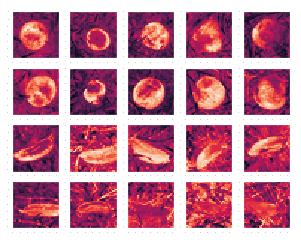

In [14]:
# Solution of question 4.2
def difference_filter(img):
    '''Extract a numpy array D = R-(G+B)/2 from a PIL image.'''
    img = crop_image(img)
    M = np.array(img)
    R = 1.*M[:,:,0]; G = 1.*M[:,:,1]; B = 1.*M[:,:,2]
    D = R-(G+B)/2
    return D

show_images(all_files, difference_filter)

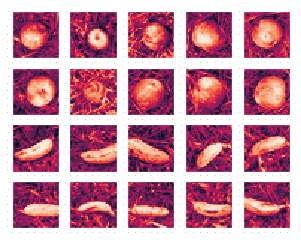

In [15]:
# Solution of question 4.2
def value_filter(img):
    '''Extract a numpy array V = (R+G+B)/3 from a PIL image.'''
    img = crop_image(img)
    M = np.array(img)
    R = 1.*M[:,:,0]; G = 1.*M[:,:,1]; B = 1.*M[:,:,2]
    V = (R+G+B)/3
    return V

show_images(all_files, value_filter)

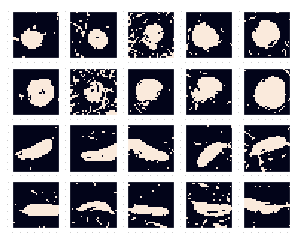

In [16]:
# Solution of question 4.4
def foreground_filter(img, theta = 2/3):
    '''Extract a numpy array with True as foreground 
    and False as background from a PIL image.
    Parameter theta is a relative binarization threshold.'''
    D = difference_filter(img)
    V = value_filter(img) 
    F0 = np.maximum(D, V)
    threshold = theta*(np.max(F0) - np.min(F0))
    F = F0>threshold
    return F

show_images(all_files, foreground_filter)

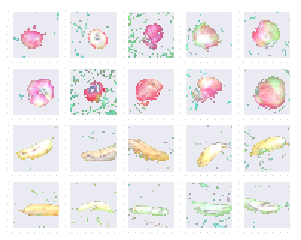

In [17]:
# Solution of question 4.5
def transparent_background_filter(img, theta = 2/3):
    '''Create a cropped image with transparent background.'''
    F = foreground_filter(img)
    img = crop_image(img)
    data=img.getdata()  # Get a list of tuples
    newData=[]
    for a, f in zip(data, F.ravel()):
        a=a[:3] # Shorten to RGB
        if not f: # background pixel
            a=(255,255,255,0)
            #a=a+(0,) # Put a transparent value in A channel (the fourth one)
        else:
            a=a+(255,) # Put a non-transparent value in A channel
        newData.append(a)
    new_img = Image.new('RGBA', (32,32))
    new_img.putdata(newData) # Get new img ready
    return new_img

show_images(all_files, transparent_background_filter)

### Question 5: Extraction of the `redness` feature
<u>Question 5.1</u>: Create a little function that extracts the `redness` as the average (mean) of `D` for the foreground pixels (those that are `True` in `F`). Call `redness_filter` and `foreground_filter` in your function. Use this template:

    def get_redness(img):
        '''Extract the scalar value redness from a PIL image.'''
        # YOUR CODE HERE
        return redness
        
<u>Question 5.2</u>: Print the redness of the really red apple like `a_files[7]` and that of a really green banana `b_files[9]` and make sure the results make sense to you.

In [18]:
# Solution of question 5.1
def get_redness(img):
    '''Extract the scalar value redness from a PIL image.'''
    D = difference_filter(img)
    F = foreground_filter(img)
    redness = np.mean(D[F])
    return redness

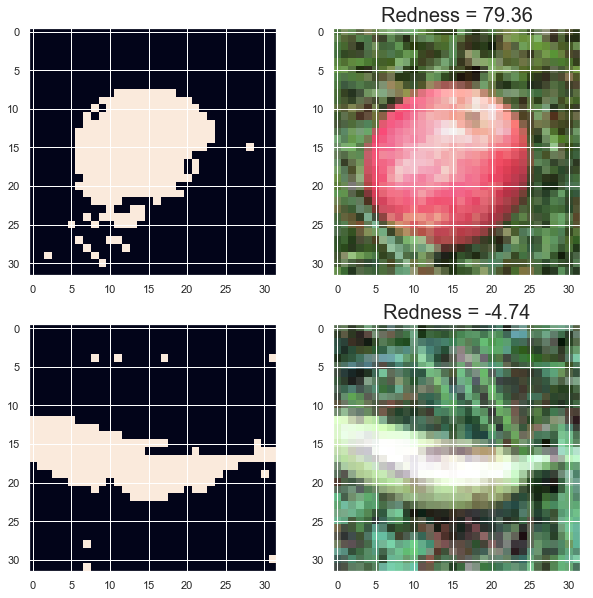

In [19]:
# Solution of question 5.2    
my_red_apple = 7
my_green_banana = 9

examples = [a_files[my_red_apple], b_files[my_green_banana]]
fig=plt.figure(figsize=(10, 10))
k = 0
for file in examples:
    img = get_image(file)
    F = foreground_filter(img)
    k = k+1
    fig.add_subplot(2, 2, k)
    plt.imshow(F)
    k = k+1
    fig.add_subplot(2, 2, k)
    plt.imshow(crop_image(img))
    redness = get_redness(img)
    plt.title("Redness = {0:.2f}".format(redness), fontsize=20)  

### Question 6: Extraction of the `elongation` feature
As can be seen from the results of question 4.4, the foreground that we extracted is rather noisy. Therefore, the method from last time will not work:
    
    # Find the elongation as the ratio witdh/height
    # using simply the range of values different from white
    # in projection on the x and y axes
    V0 = np.mean(V, axis=0)
    V1 = np.mean(V, axis=1)
    V0_idx = [i for i in range(imw) if V0[i]!=255]
    V1_idx = [i for i in range(imh) if V1[i]!=255]
    w = max(V0_idx)-min(V0_idx)
    h = max(V1_idx)-min(V1_idx)
    elongation = w/h 

So, we need to find something else. The first idea that comes to mind is to "denoise" the background. But this can be pretty difficult. Also, if we keep using the same method as last time, we will be sensitive to rotations and bananas that are not horizontal will get an incorrect aspect ratio.

For all these reasons, we propose another method: extracting the principle axes and finding the aspect ratio of the cloud of foreground pixels after rotating in the principle axes. This is a little complicated to program, but it is a mainstream method in machine learning called PCA (Principal Component Analysis), so we can use a pre-programmed function from scikit-learn!

Because this is a little complicated to figure out, I wrote the code. All you have to do is answer a simple question below. 

<u>Question 6</u>: Print the elongation of the really round apple like `a_files[0]` and that of a really elongated banana `b_files[0]` and make sure the results make sense to you.

Text(0.5, 1.0, 'Foreground scatterplot')

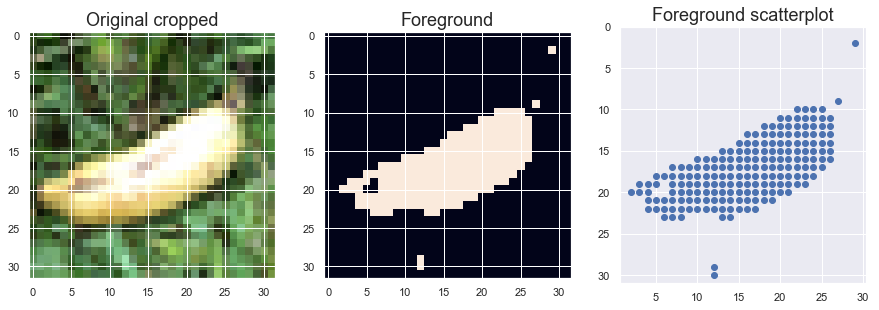

In [20]:
# We first show the foreground points as a scatter plot
# 1) We find the coordinates for foreground pixels
file = b_files[0]
img = get_image(file)
F = foreground_filter(img)
xy = np.argwhere(F)
# 2) We show those coordinates on a scatter plot
# For comparison we show the original image and the binarized image
fig=plt.figure(figsize=(15, 15))
fig.add_subplot(1, 3, 1)
plt.imshow(crop_image(img))
plt.title("Original cropped", fontsize=18) 
fig.add_subplot(1, 3, 2)
plt.imshow(foreground_filter(img))
plt.title("Foreground", fontsize=18) 
fig.add_subplot(1, 3, 3)
plt.scatter(xy[:,1], xy[:,0])
plt.ylim(31, 0)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Foreground scatterplot",  fontsize=18) 

In [21]:
# This code is given to you, you can study it to understand how it works
def get_elongation(img):
    '''Extract the scalar value elongation from a PIL image.'''
    F = foreground_filter(img)
    # Find the array indices of the foreground image pixels
    xy = np.argwhere(F)
    # We first center the data
    C = np.mean(xy, axis=0)
    Cxy = xy - np.tile(C, [xy.shape[0], 1])
    # We now apply singular value decomposition
    U, s, V = np.linalg.svd(Cxy)
    elongation = s[0]/s[1]
    return elongation

In [22]:
# Solution of question 6
examples = [a_files[0], b_files[0]]
for file in examples:
    img = get_image(file)
    elongation = get_elongation(img)
    print(elongation)

1.67724745873208
2.5806910848726163


### Question 7: Function `extract_features`
Write a function with a PIL image as input that returns `redness` and `elongation` as a list. You will use the following template:

    def extract_features(img, verbose = True):
    # Put your code here.
    # verbose is just a flag you can use to comment out print statements needed to debug your code
    return [redness, elongation]

In [23]:
# Solution of question 7
def extract_features(img, verbose = True):
    '''Take a PIL image and return two features of the foreground: redness and elongation.'''
    redness = get_redness(img)
    if verbose: print('redness={0:5.2f}'.format(redness))
    elongation = get_elongation(img)
    if verbose: print('elongation={0:5.2f}'.format(elongation))
    return [redness, elongation]

## Preprocess and visualize all the data
At this stage we do not expect you to be able to write the code to preprocess and visualize data, but check it out and try to understand it un `utilities.py`.

In [24]:
# Create a data array X with all samples (from a_files and b_files) 
#in lines and features (redness and elongation) in column. 
# Also create a column array with the `truth values`, +1 for Apple and -1 for Banana.
X, Y = preprocess_data(data_dir, extract_features)

In [25]:
# Show the values in X and Y
pretty_print(X, Y, column_names=['redness', 'elongation', 'fruit'])

,redness,elongation,fruit
0,49.525424,1.677247,1.0
1,6.371508,1.260372,1.0
2,15.979522,1.110251,1.0
3,11.083019,1.189529,1.0
4,20.037367,1.096644,1.0
5,33.863636,1.054465,1.0
6,2.503226,1.045760,1.0
7,79.362069,1.397707,1.0
8,28.257692,1.218747,1.0
9,38.712202,1.095873,1.0


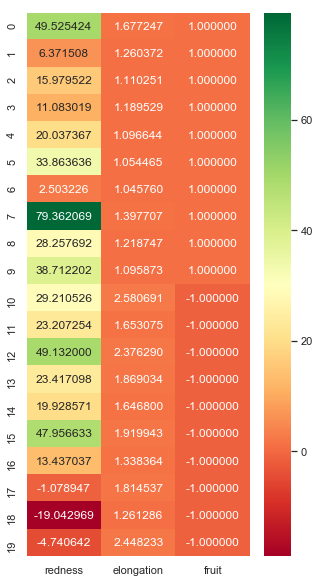

In [26]:
# Show the values as a heat map
heat_map(X, Y, column_names=['redness', 'elongation', 'fruit'])

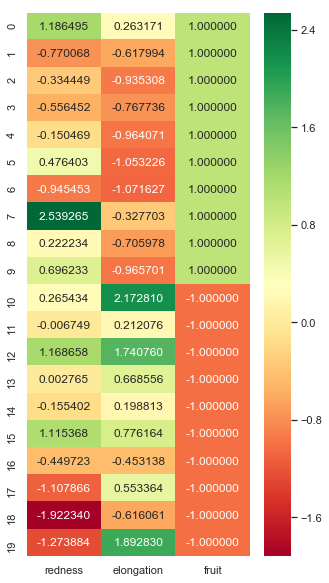

In [27]:
# For better rendering and improved results, the features are standardized.
# This means that for each column vector we subtract the mean and divide by the standard deviation
X, Y = preprocess_data(data_dir, extract_features, standardize=True)
heat_map(X, Y, column_names=['redness', 'elongation', 'fruit'])

In [28]:
# Make one training-test split in a stratified manner 
train_index, test_index = split_data(X, Y, verbose = True, seed=0)
Xtrain, Xtest = X[train_index], X[test_index]
Ytrain, Ytest = Y[train_index], Y[test_index]

TRAIN: [14 19  2 11  3 18 12  5  9  1] TEST: [ 0 17  4 13  6  8  7 16 10 15]


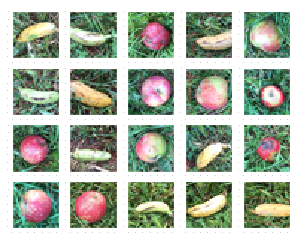

In [29]:
# Show the images in the order of the train/test split:
# Training data first.
F = np.array(a_files + b_files)
all_files = np.concatenate((F[train_index],F[test_index]))
show_images(all_files, crop_image)

In [30]:
# Plot training and test data as heat maps
#heat_map(Xtrain, Ytrain, column_names=['redness', 'elongation', 'fruit'])
#heat_map(Xtest, Ytest, column_names=['redness', 'elongation', 'fruit'])

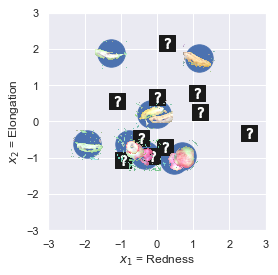

In [31]:
# Plot training and test data as scatter plots
make_scatter_plot(X, F, train_index, test_index, filter=transparent_background_filter)

# Step 2: {ME}tric definition

### Question 8: Error rate
Write a function that implements the error rate metric. Follow this template:

    def error_rate(solution, prediction):
    # Put your code here.
    return e
    
Then write unit tests what check that the error rate between `solution=Ytrain` and `prediction=Ytrain` is zero, that between `solution=Ytrain` and `prediction=np.zeros(Ytrain.shape)` is one and the between `solution=Ytrain` and `prediction=np.ones(Ytrain.shape)` is 0.5.

In [32]:
# Solution to question 8
def error_rate(solution, prediction):
    '''Compute the error rate between two vectors.'''
    e = np.mean(solution!=prediction)
    return e

assert(error_rate(Ytrain, Ytrain) == 0)
assert(error_rate(Ytrain, np.zeros(Ytrain.shape)) == 1)
assert(error_rate(Ytrain, np.ones(Ytrain.shape)) == 0.5)

### Question 9: Accuracy score
The library `scikit_learn` also called `sklearn` has a function `accuracy_score`. Check that `error_rate` = `1-accuracy_score` using the same examples as above. As part of this question you need to first figure out how to import the function `accuracy_score`. Look this up on the Internet.

In [33]:
# Solution to question 9
from sklearn.metrics import accuracy_score
assert(error_rate(Ytrain, Ytrain) == 1-accuracy_score(Ytrain, Ytrain))
assert(error_rate(Ytrain, np.zeros(Ytrain.shape)) == 1-accuracy_score(Ytrain, np.zeros(Ytrain.shape)))
assert(error_rate(Ytrain, np.ones(Ytrain.shape)) == 1-accuracy_score(Ytrain, np.ones(Ytrain.shape)))

# Step 3: {BA}seline results
The 1-nearest neighbor classifier is a nice and simple method. Luckily it is implemented in `scikit-learn`. You may also want to implement it yourself as part of your project.

### Question 10: 1-nearest-neighbor classifier
Import the `KNeighborsClassifier` classifier from `scikit-learn`. Set the number of neighbors to one. Train a model with `Xtrain` by calling the method `fit`. Then use the trained model to create two vectors of prediction `Ytrain_predicted` and `Ytest_predicted` by calling the method `predict`. Compute `e_tr`, the training error rate, and `e_tr` the test error rate.

WARNING: `scikit-learn` uses lists for prediction labels instead of column vectors. You will have to replace `Ytrain` by `Ytrain.ravel()` and `Ytest` by `Ytest.ravel()` to avoid an error message and wrong error rates.

In [34]:
# Solution to question 10
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(Xtrain, Ytrain.ravel()) 
Ytrain_predicted = neigh.predict(Xtrain)
Ytest_predicted = neigh.predict(Xtest)
e_tr = error_rate(Ytrain.ravel(), Ytrain_predicted)
e_te = error_rate(Ytest.ravel(), Ytest_predicted)
print("NEAREST NEIGHBOR CLASSIFIER")
print("Training error:", e_tr)
print("Test error:", e_te)

NEAREST NEIGHBOR CLASSIFIER
Training error: 0.0
Test error: 0.2


### Question 11: Confusion matrix
<u>Question 11.1</u> Extract the variables `tn`, `fp`, `fn`, `tp` (true negative, false positive, false negative, and true positive) using the `confusion_matrix` function of `scikit_learn`, for test data predictions.

<u>Question 11.2</u> Show the confusion matrix as a heat map.

In [35]:
# Solution to question 11.1
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(Ytest.ravel(), Ytest_predicted).ravel()
print(tn, fp, fn, tp)

4 1 1 4


### Here we overlay the predictions on test examples on the scatter plot ...

./code/utilities.py:138: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if len(predicted_labels)>0 and not(predicted_labels == "GroundTruth"):


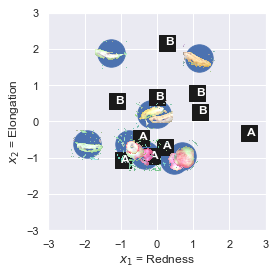

In [36]:
make_scatter_plot(X, F, train_index, test_index, 
                  filter=transparent_background_filter, predicted_labels=Ytest_predicted)

### ... then, we show the "ground truth" and compute the error rate

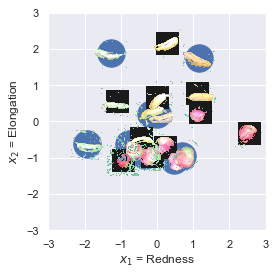

In [37]:
make_scatter_plot(X, F, train_index, test_index, 
                  filter=transparent_background_filter, predicted_labels='GroundTruth')

In [38]:
# Print the error rate
e_te = error_rate(Ytest.ravel(), Ytest_predicted)
print("ERROR RATE NEAREST NEIGHBOR CLASSIFIER:", e_te)

ERROR RATE NEAREST NEIGHBOR CLASSIFIER: 0.2


# Step 4: {BAR}s of error and test set size
Last but not least let us evaluate the significance of our results bu computing error bars. Obviously, since we have only 10 test examples, we cannot see at least 100 errors (which is the target we gave to ourselves in class). But this is only a toy example.

### Question 12: Test set error bar
Compute the 1-sigma error bar of e_te using the standard error formula defined in class. How many test examples would we need to divide this error bar by a factor of two?

In [39]:
# Solution to question 12
n_te = len(Ytest)
sigma = np.sqrt(e_te * (1-e_te) / n_te)
print(sigma)

0.1264911064067352


## Cross-validation (CV) error bar
Another way of computing an error bar is to repeat multiple times the train/test split and compute the mean and standard deviation of the test error. In some sense this is more informative because it involves both the variability of the training set and that of the test set. But is is known to be a biased estimator of the error variability.

In [40]:
n=10
SSS = StratifiedShuffleSplit(n_splits=n, test_size=0.5, random_state=5)
E = np.zeros([n,1])
k = 0
for train_index, test_index in SSS.split(X, Y):
    print("TRAIN:", train_index, "TEST:", test_index)
    Xtrain, Xtest = X[train_index], X[test_index]
    Ytrain, Ytest = Y[train_index], Y[test_index]
    neigh.fit(Xtrain, Ytrain.ravel()) 
    Ytrain_predicted = neigh.predict(Xtrain)
    Ytest_predicted = neigh.predict(Xtest)
    e_te = error_rate(Ytest.ravel(), Ytest_predicted)
    print("TEST ERROR RATE:", e_te)
    E[k] = e_te
    k = k+1
    
e_te_ave = np.mean(E)
print("\n\nCV ERROR RATE:", e_te_ave)
print("CV STANDARD DEVIATION:", np.std(E))

sigma = np.sqrt(e_te_ave * (1-e_te_ave) / n_te)

# It is bad practice to show too many decimal digits:
# print("STANDARD ERROR BAR:", sigma)
print("STANDARD ERROR BAR: {0:.2f}".format(sigma))

TRAIN: [19 14  6  3  8 12  2  5 17 15] TEST: [ 9 13 16  4  7  1 11 18 10  0]
TEST ERROR RATE: 0.4
TRAIN: [10 16  2 11 15  3  1  6 17  0] TEST: [14 13  7 12 18  9  5  4  8 19]
TEST ERROR RATE: 0.1
TRAIN: [ 4 11  5 19 12 15  9 13  8  1] TEST: [ 3 17 14  2  7 18  6 16 10  0]
TEST ERROR RATE: 0.4
TRAIN: [10 13 15  6  5 17  0 16  9  7] TEST: [11  3  8 14 18 19  1 12  2  4]
TEST ERROR RATE: 0.5
TRAIN: [19  6  5 13 14  4  8 11  0 12] TEST: [ 7 17 15 10  3 18 16  2  1  9]
TEST ERROR RATE: 0.3
TRAIN: [ 4  6 12  8  0 10 18  7 13 19] TEST: [ 1 16  3  2 14 15  5 17 11  9]
TEST ERROR RATE: 0.2
TRAIN: [10 18 12  6  7 13  8  4 14  9] TEST: [17  0 11 19  5 15  1 16  3  2]
TEST ERROR RATE: 0.2
TRAIN: [ 3 10  7 15  2 16  8 18  6 13] TEST: [ 9  5 19 11 14 17 12  1  4  0]
TEST ERROR RATE: 0.1
TRAIN: [ 3  7  8 14  1 16 15 10 12  4] TEST: [ 9 11  2 17 13 19 18  5  6  0]
TEST ERROR RATE: 0.2
TRAIN: [18 10  4  8 17  7 12 13  2  9] TEST: [ 1  0 11 14 15  5 19  6 16  3]
TEST ERROR RATE: 0.2


CV ERROR RATE: 0.2

## Extra credit: Your own classifier

### Question 13: Create a classifier

<u>Question 13.1</u>: Predict function. Add one line of code in the example below that creates a classifier which uses G = Redness - Elongation as a discriminant value and classifies a new example as an apple if G>=0 and as a banana if G<0.

    def predict(X):
        '''Function taking an array X of unlabeled examples as input and returning the predicted label vector Y.'''
        # YOUR CODE HERE
        return Y
        
<u>Question 13.2</u>: Make predictions. Find predicted values for the training examples Xtrain and the test examples Xtest. 

<u>Question 13.3</u>: Compute the error rate of your predictions.

<u>Question 13.4</u>: Show the training and test data on separate scatter plots. Plot the decision boundary G = 0 (that is Redness = Elongation or $x_1=x_2$).

In [57]:
# Solution to question 13.1
def predict(X):
    '''Function taking an array X of unlabeled examples as input and returning the predicted label vector y.'''
    G = X[:,0]-X[:,1]
    Y = np.ones([X.shape[0],1])
    Y[G<0] = -1
    return Y

In [58]:
# Solution to question 13.2
Ytrain_predicted = predict(Xtrain)
Ytest_predicted = predict(Xtest)

In [59]:
# Solution to question 13.3
e_tr = error_rate(Ytrain, Ytrain_predicted)
e_te = error_rate(Ytest, Ytest_predicted)
print("MY FIRST CLASSIFIER")
print("Training error:", e_tr)
print("Test error:", e_te)

MY FIRST CLASSIFIER
Training error: 0.0
Test error: 0.3


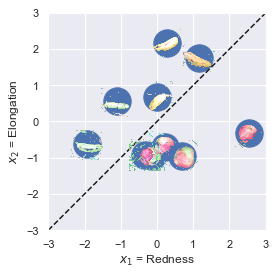

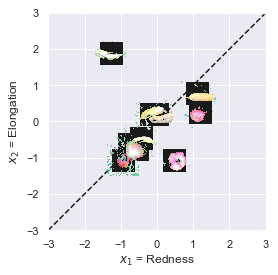

In [60]:
make_scatter_plot(X, F, train_index, [], 
                  filter=transparent_background_filter, predicted_labels='GroundTruth',
                 show_diag=True)
make_scatter_plot(X, F, [], test_index, 
                  filter=transparent_background_filter, predicted_labels='GroundTruth',
                 show_diag=True)